In [1]:
library(Deriv)

Warning message:
“package ‘Deriv’ was built under R version 3.6.3”

In [2]:
n <- 100
betas <- rbeta(n,5,1)

In [3]:
betas[1:5]

[1] 0.9701233 0.9369380 0.8749833 0.9027304 0.9959650

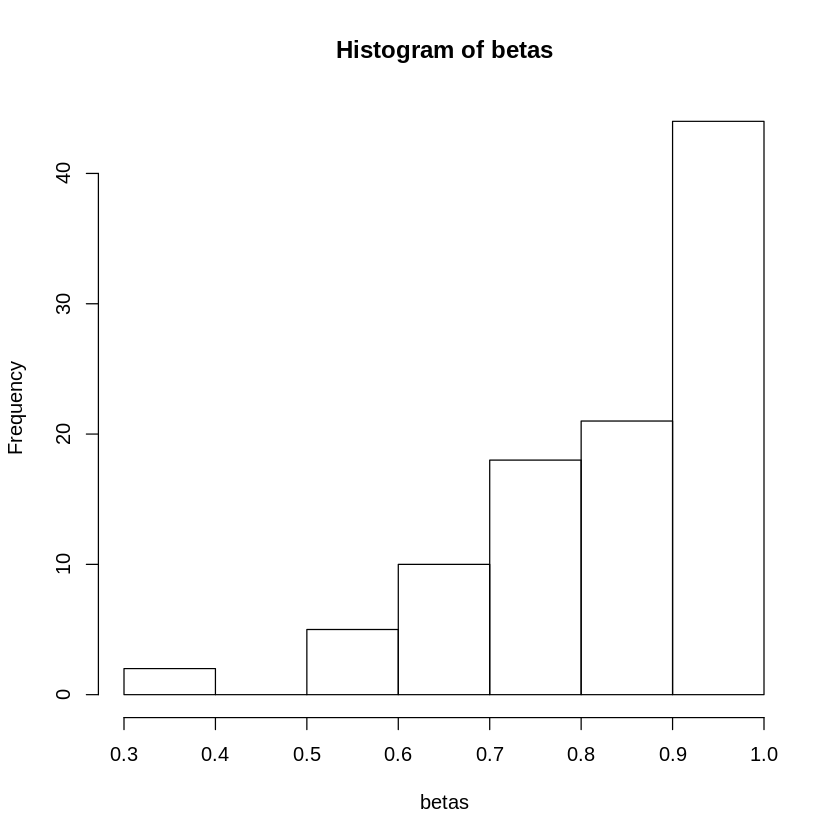

In [4]:
hist(betas)

In [5]:
sal <- function(aa,bb,cc,dd,a,b,c,d,y){
    aa + bb*sinh(cc*asinh(a + b*sinh(c*asinh(y)+d))+dd)
    }
# sal = expression(a + b*sinh(c*asinh(y)+d))
drule[["asinh"]] <- alist(x=1/sqrt(x^2+1))

d_sal = Deriv(sal,"y")

# negative log likelihood function
# https://stackoverflow.com/questions/20479315/optim-function-argument-missing
# Optimize mean and covariance too!!!
nllf <- function(v){
    a <- v[5]
    b <- v[6]
    c <- v[7]
    d <- v[8]
    aa <- v[1] 
    bb <- v[2]
    cc <- v[3]
    dd <- v[4]
    return(-sum(log(d_sal(aa,bb,cc,dd,a,b,c,d,betas))))
    }


In [6]:
d_sal

function (aa, bb, cc, dd, a, b, c, d, y) 
{
    .e3 <- c * asinh(y) + d
    .e4 <- a + b * sinh(.e3)
    b * bb * c * cc * cosh(.e3) * cosh(cc * asinh(.e4) + dd)/(sqrt(.e4^2 + 
        1) * sqrt(1 + y^2))
}

In [7]:
#log likelihood
# L = -1/2log|C|-1/2(y-\mu)C^{-1}(y-\mu)+\sum log \partial \phi(yi)/\partial yi - N/2 log2\pi

In [8]:
o = optim(par=rep(1,8),fn=nllf,control=list(maxit=70))
o

$par
[1]  0.3801866  1.5158545  2.4591549  0.4253535 -1.6078827  2.3835785  2.5492981
[8]  1.6758897

$value
[1] -1263.859

$counts
function gradient 
      71       NA 

$convergence
[1] 1

$message
NULL

In [9]:
par = o$par

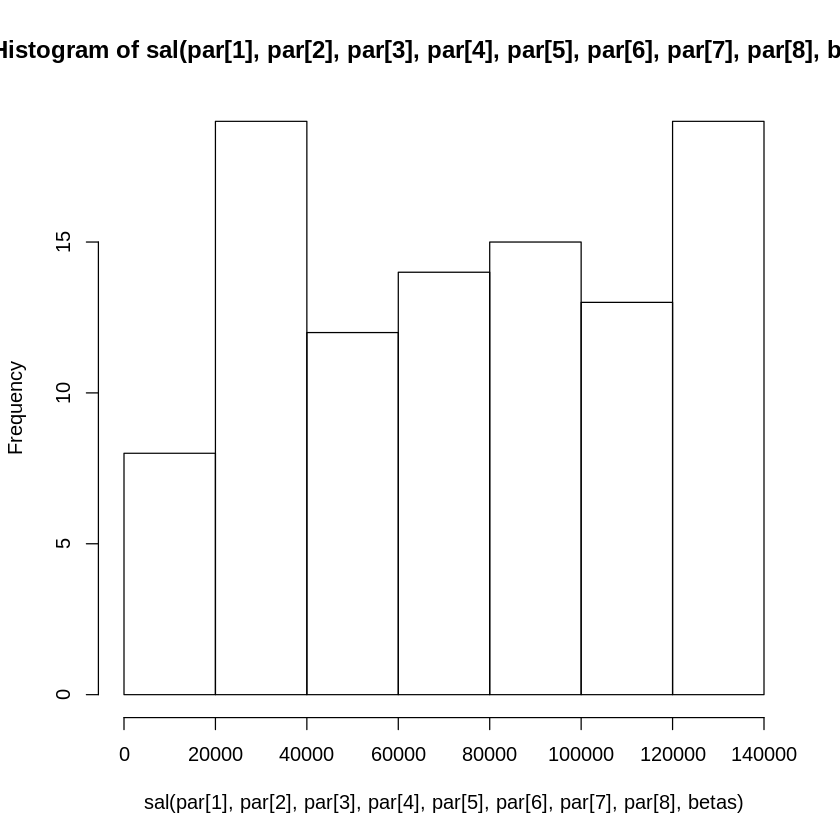

In [10]:
hist(sal(par[1],par[2],par[3],par[4],par[5],par[6],par[7],par[8],betas))